# Plot 3D map of mRNA levels as a function of positive charge and bulkiness

## Load libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

## Read in data

In [2]:
data = pd.read_table("../tables/pi_bulkiness_mrna_level.tsv")
data

,insert_num,dicodon,diaa,codon1,codon2,aa1,aa2,lfc,hydropathicity,beta_sheet,alpha_helix,bulkiness,p_i,interaction_no_ss_model,no_interaction_no_ss_model,order
0,520,AGAAGA,RR,AGA,AGA,R,R,-0.204261,-4.50,0.930,0.980,14.280,10.760,-1.054052,-1.166446,-0.204261
1,8,AAAAGA,KR,AAA,AGA,K,R,-0.594869,-4.20,0.835,1.070,14.995,10.250,-1.047409,-1.012559,-0.594869
2,2,AAAAAG,KK,AAA,AAG,K,K,0.441629,-3.90,0.740,1.160,15.710,9.740,-1.008397,-0.858673,0.441629
3,1096,CACAGA,HR,CAC,AGA,H,R,-2.000000,-3.85,0.900,0.990,13.985,9.175,-0.676028,-0.799404,-2.000000
4,1088,CACAAA,HK,CAC,AAA,H,K,-0.867219,-3.55,0.805,1.080,14.700,8.665,-0.625764,-0.645518,-0.867219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,2113,GACAAC,DN,GAC,AAC,D,N,0.418916,-3.50,0.715,0.840,12.250,4.090,0.157346,0.343298,0.418916
204,3681,TGCGAC,CD,TGC,GAC,C,D,0.765831,-0.50,0.865,0.855,12.570,3.920,0.222095,0.398202,0.765831
205,2080,GAAGAA,EE,GAA,GAA,E,E,-0.319164,-3.50,0.370,1.510,13.570,3.220,0.487352,0.610241,-0.319164
206,2144,GACGAA,DE,GAC,GAA,D,E,0.622358,-3.50,0.455,1.260,12.625,2.995,0.364907,0.622442,0.622358


## Plot heatmap

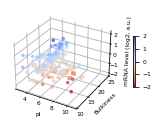

In [3]:
fig = plt.figure(figsize=(3,2))

ax = fig.add_subplot(projection='3d')

import matplotlib
import matplotlib.cm as mcm


plt.rcParams.update({'font.size': 6, 
'font.family': 'DejaVu Sans'}) 

cm = plt.get_cmap('coolwarm_r')

p = ax.scatter(data['p_i'], data['bulkiness'], data['lfc'], c=data['lfc'], cmap=cm, s=6)

ax.set_xlabel('pI', labelpad=-10, size=6)
ax.set_ylabel('Bulkiness', labelpad=-10, size=6)
ax.set_zlabel('mRNA level (log2, a.u.)', labelpad=-10, size=6)
ax.set_ylim([10, 25])
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
plt.locator_params(nbins=5)
ax.tick_params(axis='both', width=20, labelsize=6, pad=-5)

cbar = fig.colorbar(p, ax=ax, pad=0.1, fraction=0.015)
cbar.ax.tick_params(labelsize=6)

plt.savefig('../figures/plot3d_pi_bulkiness_mrna_level.pdf')